In [43]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/stacking_dataset.csv')

In [5]:
y = df.pop('class')

In [31]:
lr = LogisticRegression()
kf = KFold(n_splits=5)
y_proba = []
y_true = []

for i, (train_index, val_index) in enumerate(kf.split(df)):
    print(f'Fold {i}')
    X_train = df.loc[train_index]
    y_train = y.loc[train_index]
    X_test = df.loc[val_index]
    y_test = y.loc[val_index]
    y_proba.extend(lr.fit(X_train, y_train).predict_proba(X_test)[:,1])
    y_true.extend(y_test)

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4


In [52]:
size_loop = 100
step = (0.9-0.1)/size_loop
best_mcc = -1
best_param = -1
thresholds = []
scores = []
decision_threshold = 0.1

for i in range(size_loop):
    print(f'loop i: {i}')
    thresholds.append(decision_threshold)
    y_pred = (np.array(y_proba) > decision_threshold).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    scores.append(mcc)
    
    if(mcc > best_mcc):
        best_mcc = mcc
        best_param = decision_threshold
    
    decision_threshold+=step

print(f'best_param: {best_param}')
print(f'best mcc: {best_mcc}')

loop i: 0
loop i: 1
loop i: 2
loop i: 3
loop i: 4
loop i: 5
loop i: 6
loop i: 7
loop i: 8
loop i: 9
loop i: 10
loop i: 11
loop i: 12
loop i: 13
loop i: 14
loop i: 15
loop i: 16
loop i: 17
loop i: 18
loop i: 19
loop i: 20
loop i: 21
loop i: 22
loop i: 23
loop i: 24
loop i: 25
loop i: 26
loop i: 27
loop i: 28
loop i: 29
loop i: 30
loop i: 31
loop i: 32
loop i: 33
loop i: 34
loop i: 35
loop i: 36
loop i: 37
loop i: 38
loop i: 39
loop i: 40
loop i: 41
loop i: 42
loop i: 43
loop i: 44
loop i: 45
loop i: 46
loop i: 47
loop i: 48
loop i: 49
loop i: 50
loop i: 51
loop i: 52
loop i: 53
loop i: 54
loop i: 55
loop i: 56
loop i: 57
loop i: 58
loop i: 59
loop i: 60
loop i: 61
loop i: 62
loop i: 63
loop i: 64
loop i: 65
loop i: 66
loop i: 67
loop i: 68
loop i: 69
loop i: 70
loop i: 71
loop i: 72
loop i: 73
loop i: 74
loop i: 75
loop i: 76
loop i: 77
loop i: 78
loop i: 79
loop i: 80
loop i: 81
loop i: 82
loop i: 83
loop i: 84
loop i: 85
loop i: 86
loop i: 87
loop i: 88
loop i: 89
loop i: 90
loop i: 9

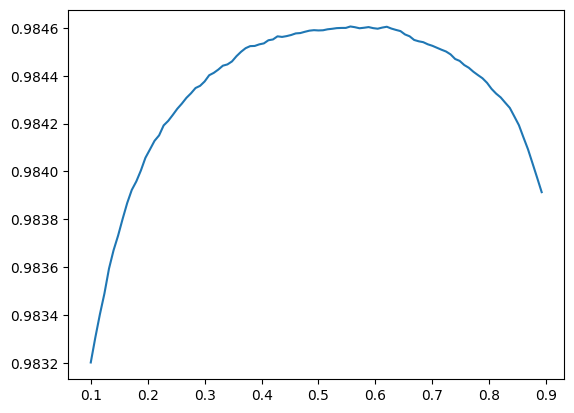

In [54]:
plt.plot(thresholds, scores)